# ***Import libraries***

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ***Load Bank Personal Loan Modelling dataset & explore***

Dữ liệu được lấy từ https://www.kaggle.com/teertha/personal-loan-modeling

In [3]:
loan_dataset = pd.read_csv('Loan Modelling Thera Bank.csv')
loan_dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
loan_dataset.keys()

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [5]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
loan_dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


# ***Data visualization***

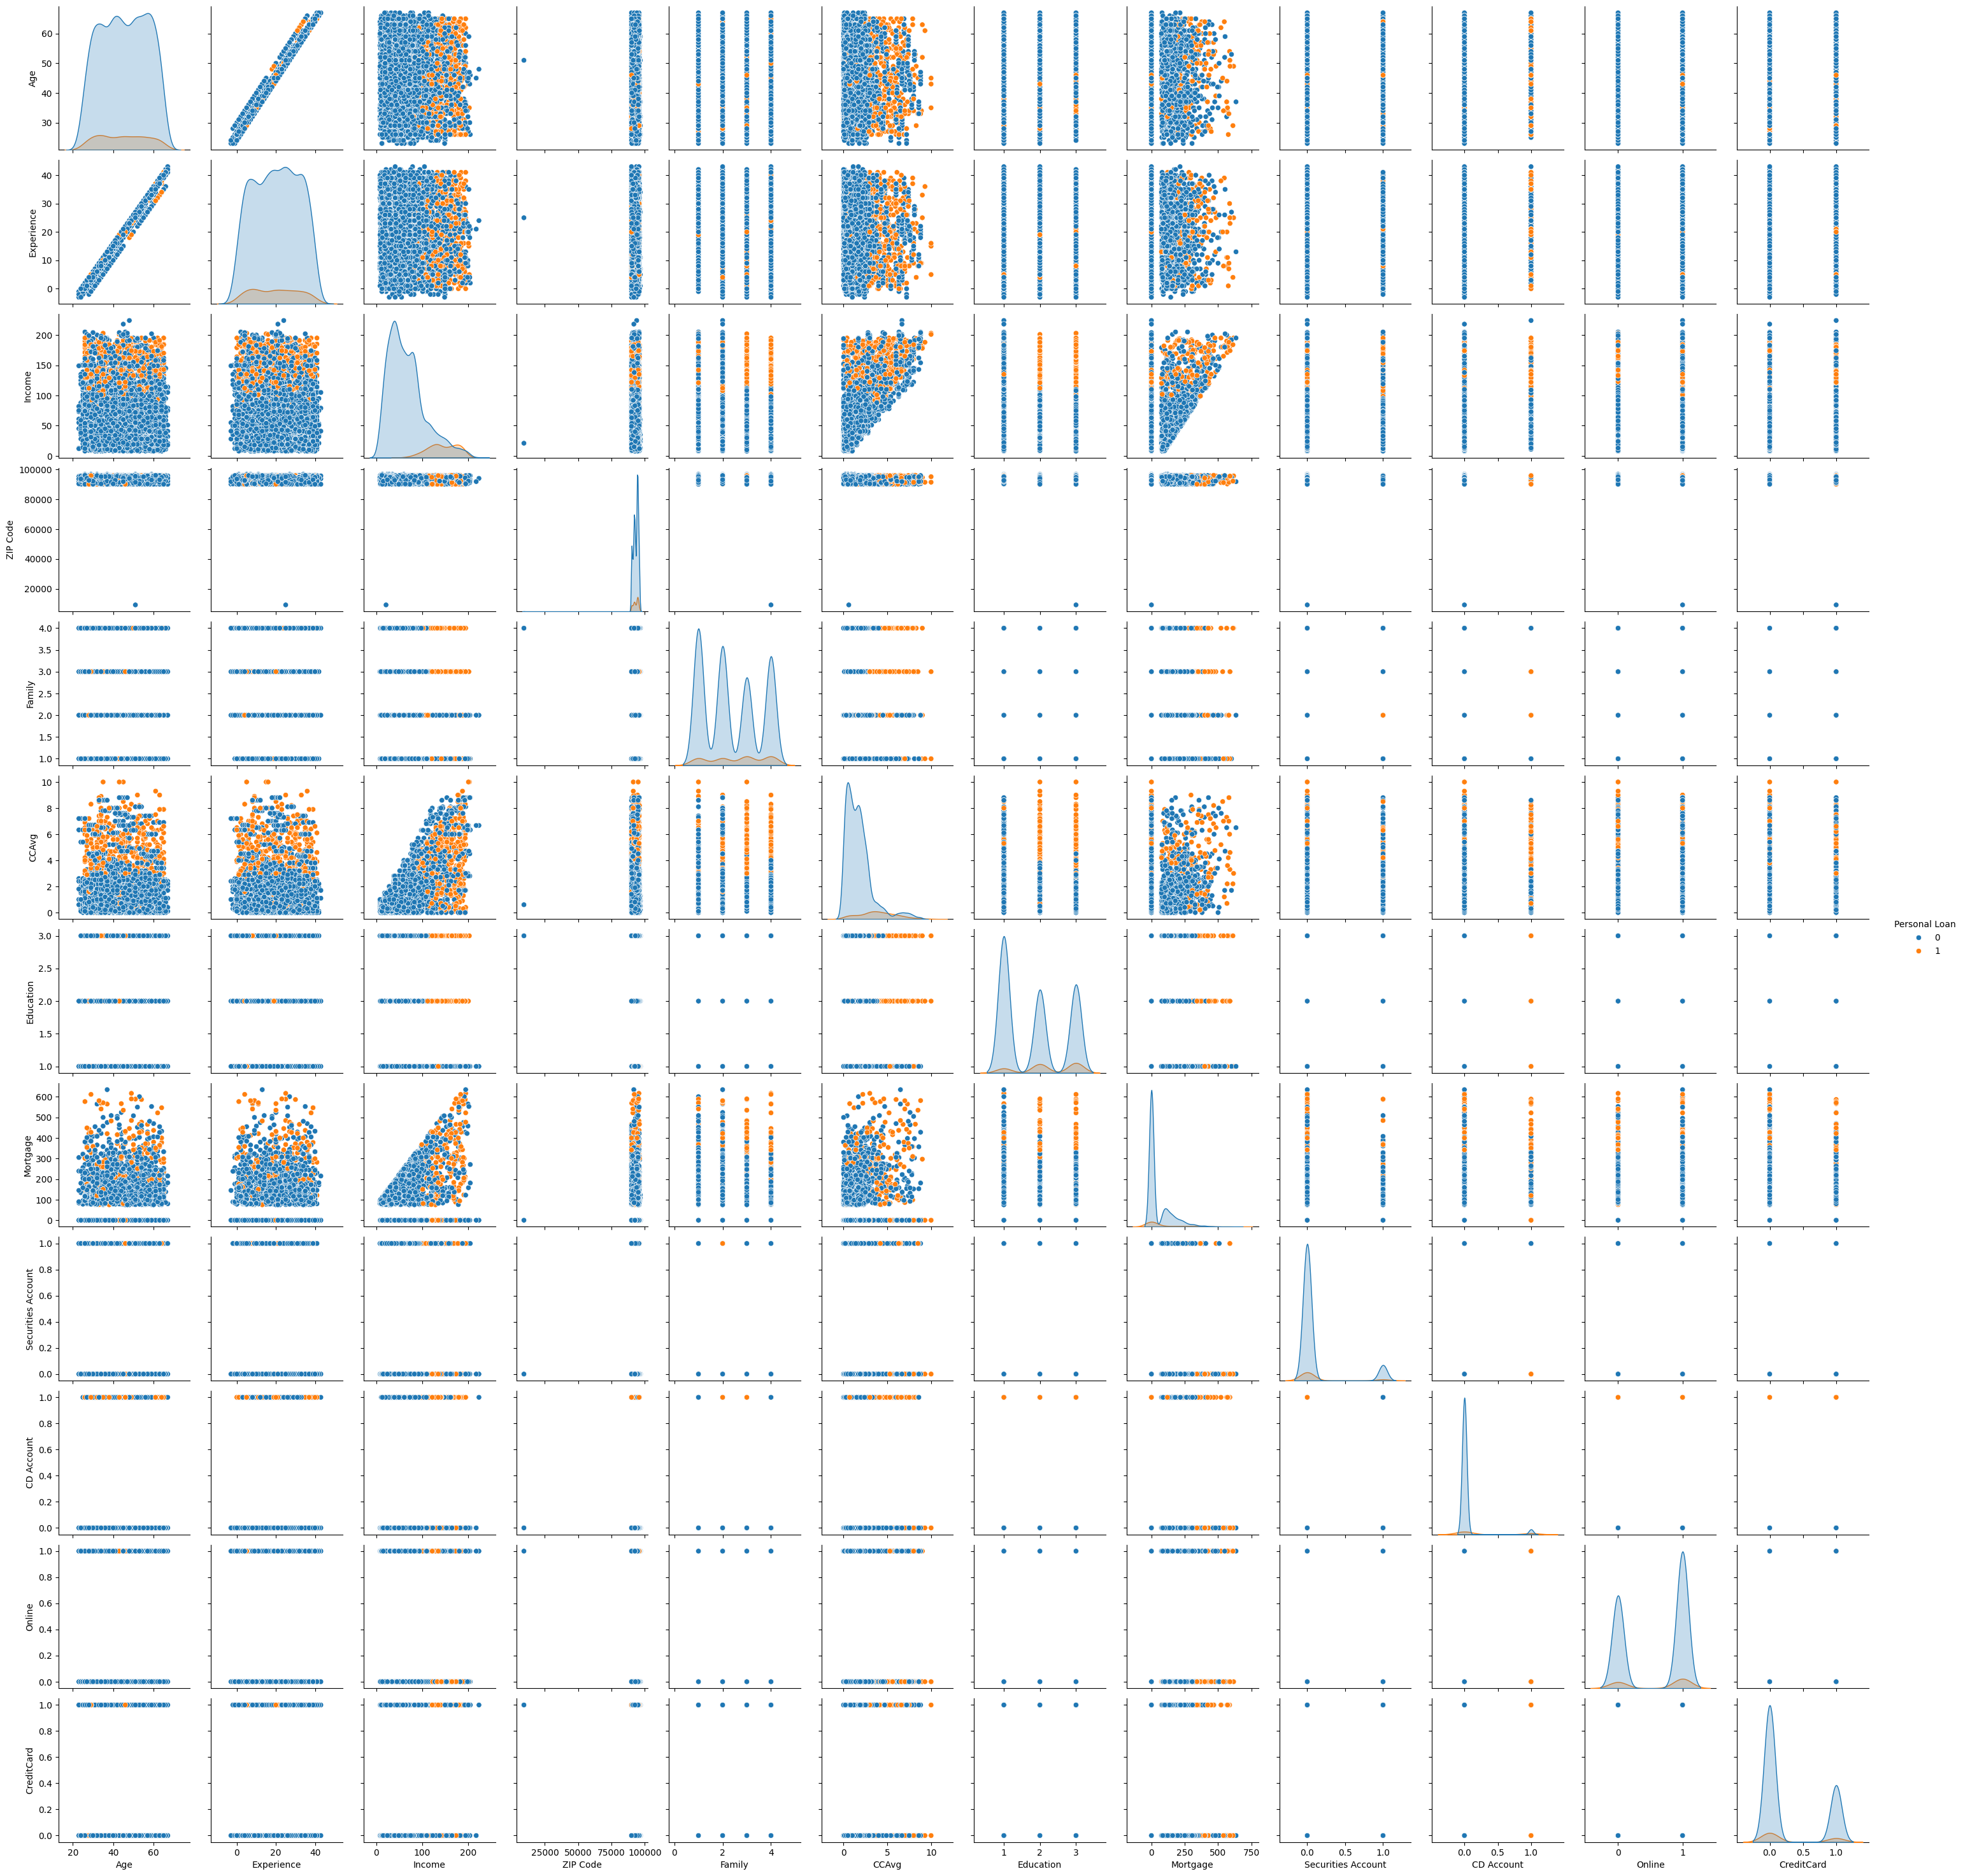

In [7]:
sns.pairplot(loan_dataset, 
             hue='Personal Loan', 
             vars=['Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
                   'Education', 'Mortgage', 'Securities Account',
                   'CD Account', 'Online', 'CreditCard'])

<Axes: ylabel='count'>

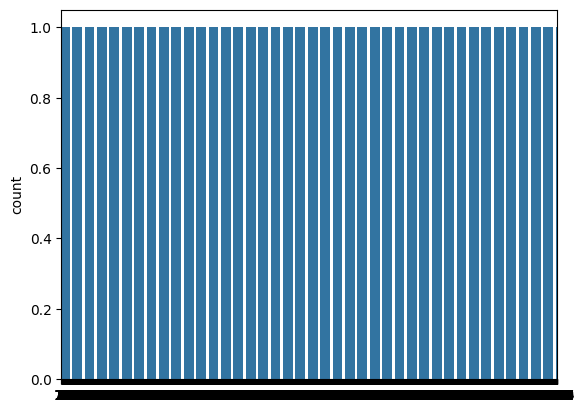

In [8]:
sns.countplot(loan_dataset['Personal Loan'])

<Axes: >

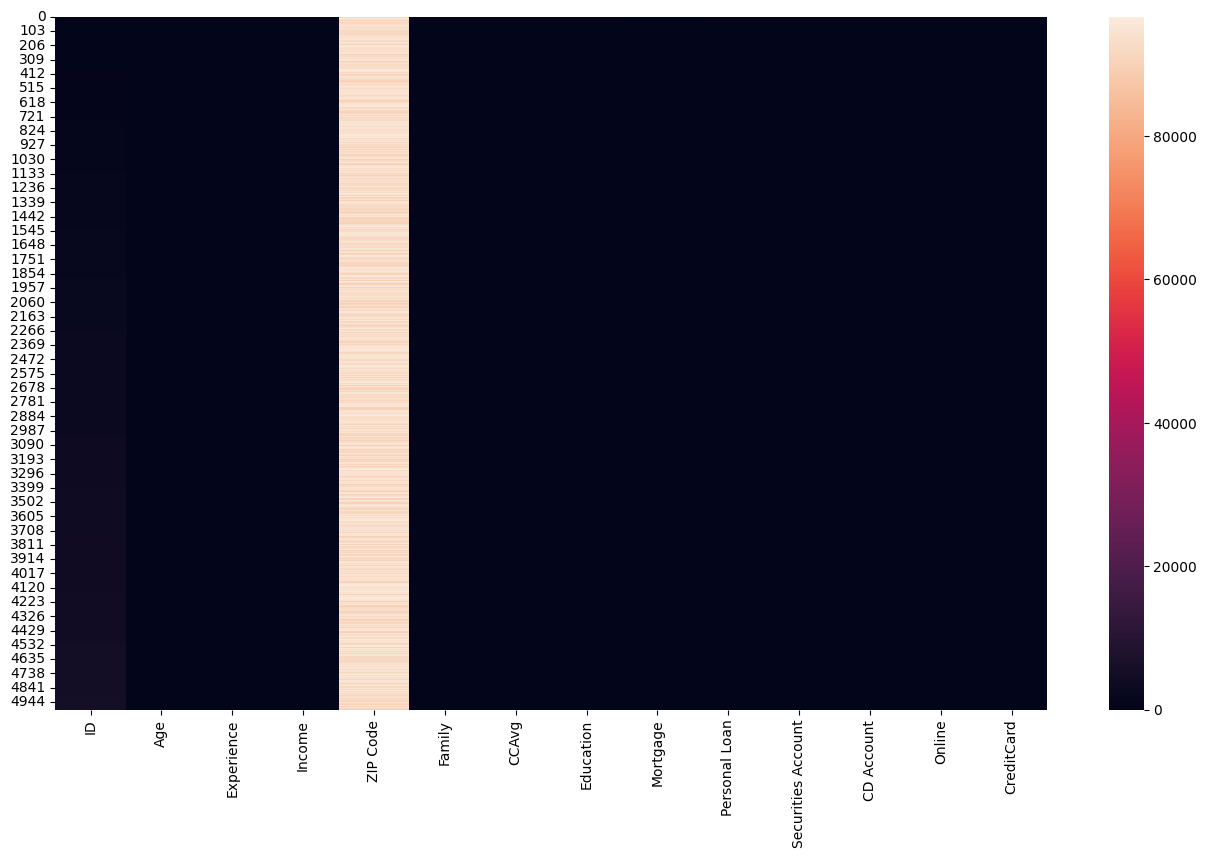

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(loan_dataset)

<Axes: >

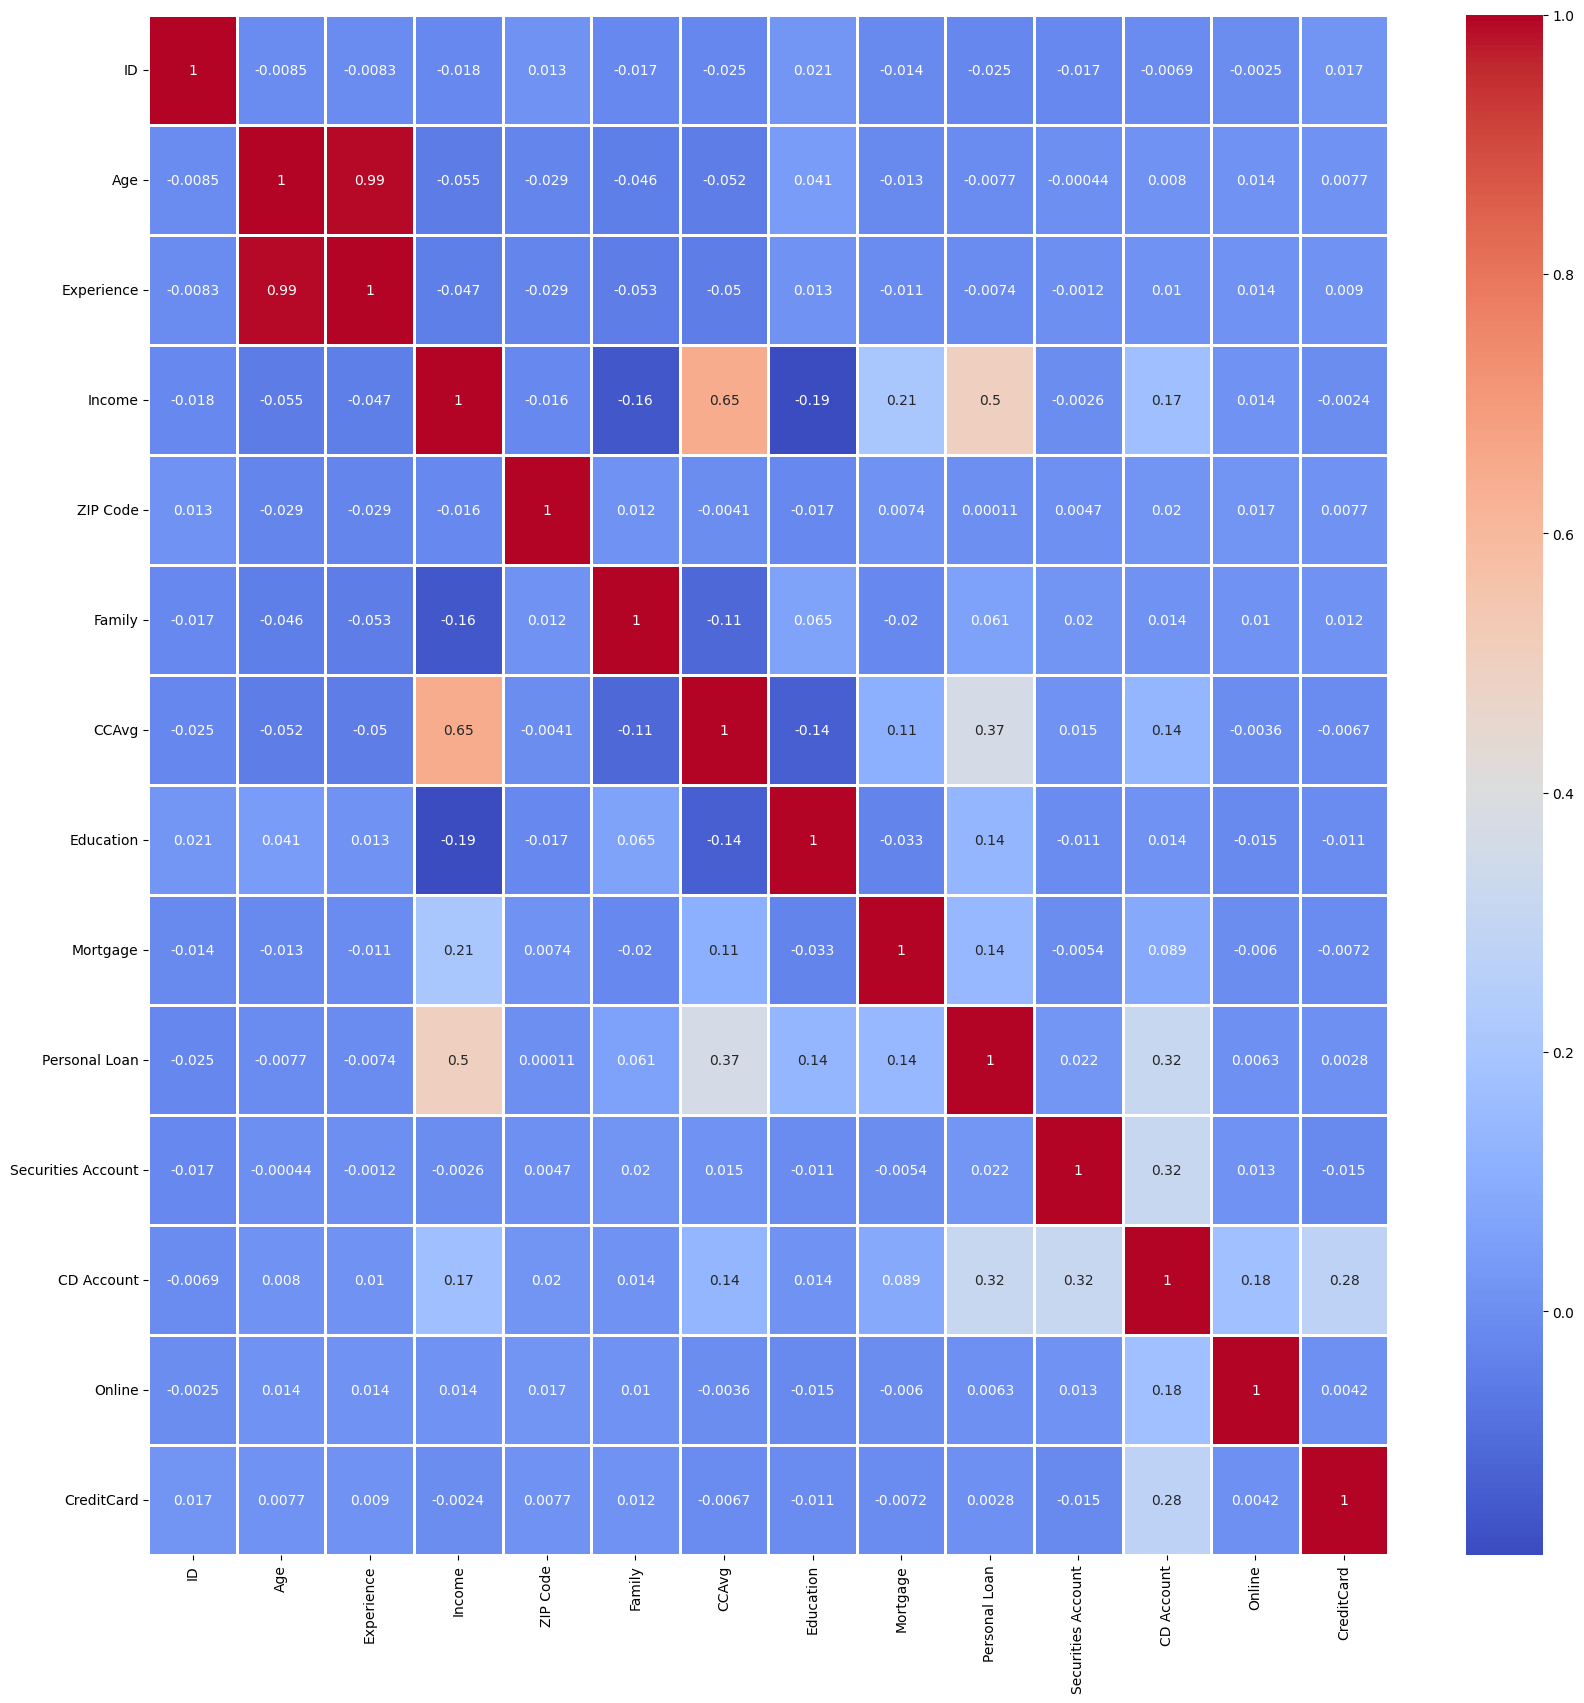

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(loan_dataset.corr(), annot=True, cmap='coolwarm', linewidths=2)

# ***Data preprocessing***

***Normalization***

In [11]:
X = loan_dataset.drop(['Personal Loan', 'ID'], axis=1)
# X = (X-X.mean())/X.var()
X = (X-X.min())/(X.max()-X.min())
X

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,0.045455,0.086957,0.189815,0.936527,1.000000,0.16,0.0,0.000000,1.0,0.0,0.0,0.0
1,0.500000,0.478261,0.120370,0.924872,0.666667,0.15,0.0,0.000000,1.0,0.0,0.0,0.0
2,0.363636,0.391304,0.013889,0.977892,0.000000,0.10,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.272727,0.260870,0.425926,0.970931,0.000000,0.27,0.5,0.000000,0.0,0.0,0.0,0.0
4,0.272727,0.239130,0.171296,0.939080,1.000000,0.10,0.5,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.136364,0.130435,0.148148,0.954731,0.000000,0.19,1.0,0.000000,0.0,0.0,1.0,0.0
4996,0.159091,0.152174,0.032407,0.947174,1.000000,0.04,0.0,0.133858,0.0,0.0,1.0,0.0
4997,0.909091,0.913043,0.074074,0.958463,0.333333,0.03,1.0,0.000000,0.0,0.0,0.0,0.0
4998,0.954545,0.934783,0.189815,0.924242,0.666667,0.05,0.5,0.000000,0.0,0.0,1.0,0.0


In [12]:
X.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,0.507691,0.502274,0.304510,0.959946,0.465467,0.193794,0.440500,0.088974,0.104400,0.06040,0.596800,0.294000
std,0.260526,0.249303,0.213119,0.024293,0.382554,0.174766,0.419935,0.160179,0.305809,0.23825,0.490589,0.455637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.272727,0.282609,0.143519,0.945732,0.000000,0.070000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,0.500000,0.259259,0.963203,0.333333,0.150000,0.500000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,0.727273,0.717391,0.416667,0.976610,0.666667,0.250000,1.000000,0.159055,0.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


<Axes: >

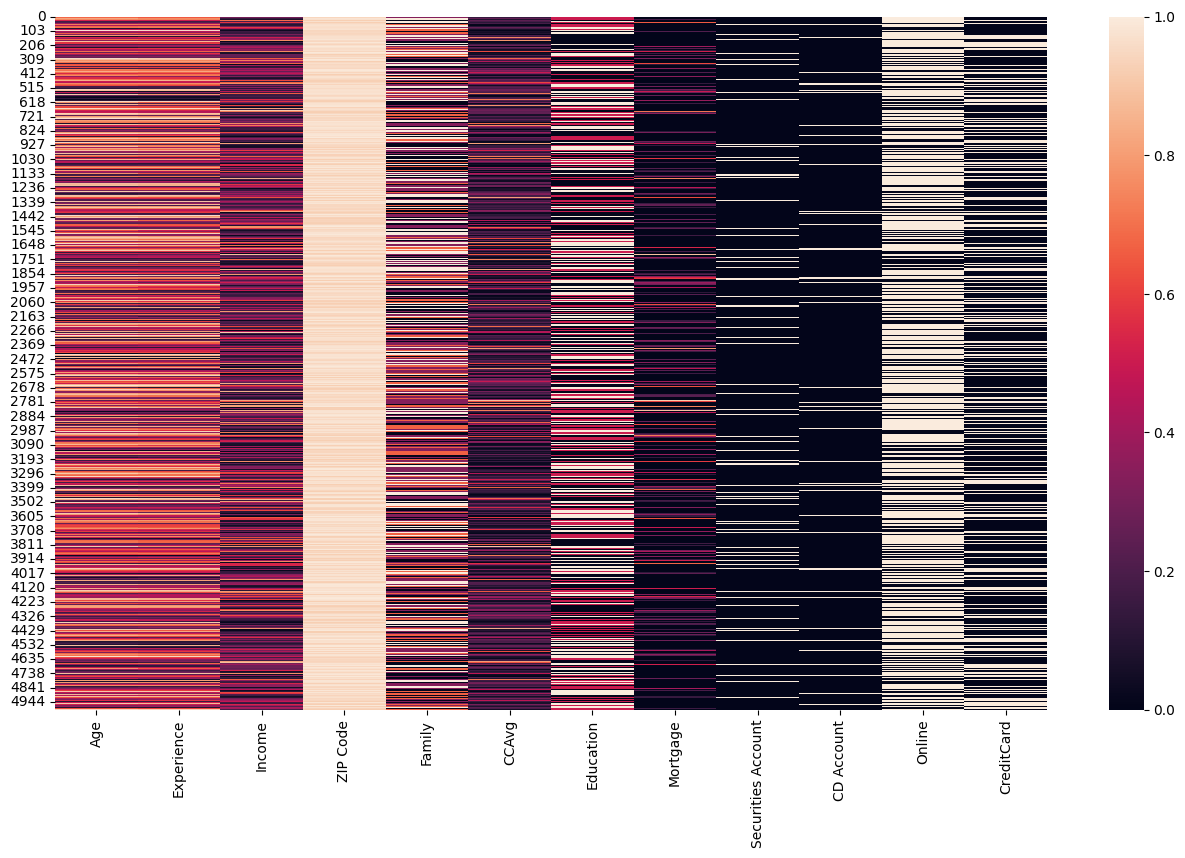

In [13]:
plt.figure(figsize=(16,9))
sns.heatmap(X)

In [14]:
y = loan_dataset['Personal Loan']
y

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64

## Chia dữ liệu làm 2 phần training và testing 

- Training chiếm 80 % dữ liệu 
- Testing chiếm 20 % dữ liệu 

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
print("Dữ liệu training = ", X_train.shape, y_train.shape)
print("Dữ liệu testing = ", X_test.shape, y_test.shape)

Dữ liệu training =  (4000, 12) (4000,)
Dữ liệu testing =  (1000, 12) (1000,)


# ***Personal Loan Modeling***

In [16]:
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

# ***K - Nearest Neightbor Classifier***

# Bài toán phân loại sử dụng KNN 

Mục tiêu: 

- Xây dựng được mô hình KNN sử dụng thư viện sklearn. 
- Ứng dụng, hiểu cách áp dụng mô hình KNN vào giải quyết bài toán thực tế (vd: phân loại) 
- Sử dụng độ đo Accuracy, Precision, Recall để làm độ đo đánh giá chất lượng mô hình. 

Vấn đề: 
- Có một tập các dữ liệu không có nhãn, làm sao để biết dữ liệu này là thuộc về nhãn nào.
- => Xây dựng mô hình học máy có thể phân loại.  

Dữ liệu: 
- Dữ liệu Bank Personal Loan Modelling
- Xem thêm: https://www.kaggle.com/teertha/personal-loan-modeling

Bài toán: 
- Input: 1 mẫu dữ liệu $X = [x_1, x_2, ... x_n]$
- Output: nhãn $y$ là 0 hoặc 1 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

# **1.** Mô hình KNN
Sử dụng thư viện sklearn để xây dựng mô hình
- `KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)`
- Số láng giềng: n_neighbors = 5
- Độ đo khoảng cách: Euclide p = 2

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
knn_classifier.fit(X_train, y_train)

,n_neighbors,10
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


# **2.** Testing KNN model

## Đánh giá theo các độ đo

In [19]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

print("Testing...\n")
y_pred_knn = knn_classifier.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred_knn))
print('Precision: ', precision_score(y_test, y_pred_knn))
print('Recall: ', recall_score(y_test, y_pred_knn))

Testing...

Accuracy:  0.952
Precision:  0.9166666666666666
Recall:  0.5


# **3.** Lựa chọn mô hình

In [20]:
# Chuẩn bị dữ liệu đầu vào 

X = loan_dataset.drop(['Personal Loan', 'ID'], axis=1)
X = (X-X.min())/(X.max()-X.min())
y = loan_dataset['Personal Loan']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

## Lựa chọn số lượng láng giềng
- Thay đổi số lượng láng riềng tìm giá trị cho kết quả phân loại tốt nhất

In [21]:
# Tạo models với các giá trị neighbors khác nhau
n_neighbors = [1,2,3,4,5,6,7,8,9,10,15,20,30]
models = []
for n in n_neighbors:
    knn_classifier = KNeighborsClassifier(n_neighbors = n, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    models.append(knn_classifier)

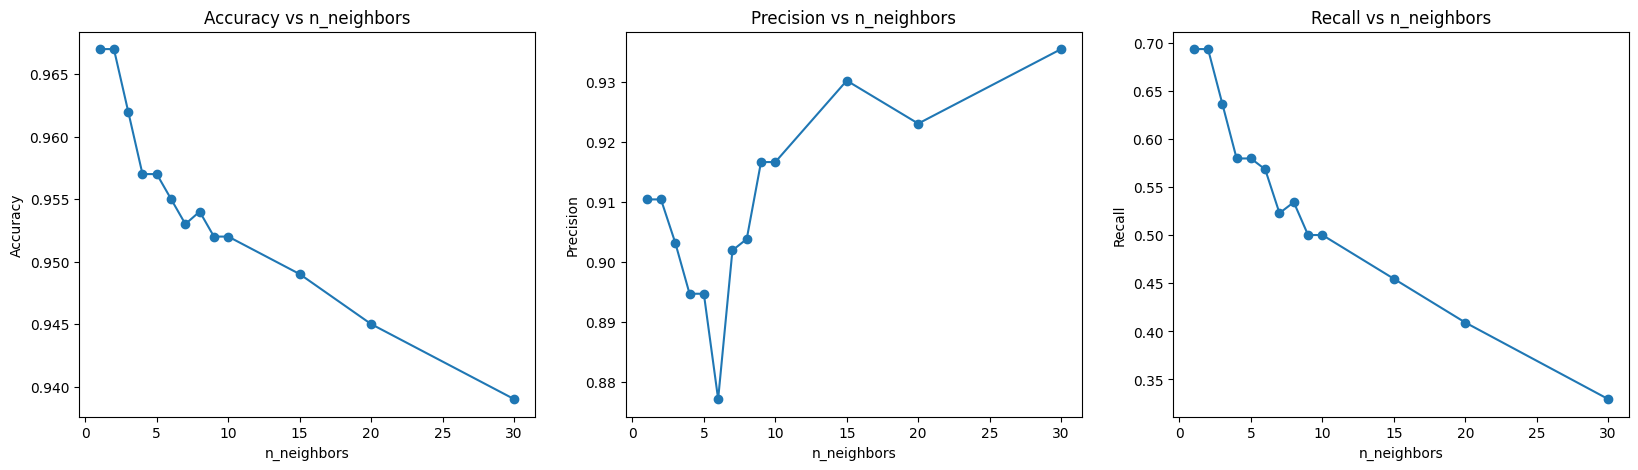

In [22]:
# Đánh giá các models
acc, prec, re = [], [], []
for model in models:
    y_pred = model.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    prec.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

# Vẽ đồ thị
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].plot(n_neighbors, acc, marker='o')
axs[0].set_title('Accuracy vs n_neighbors')
axs[0].set_xlabel('n_neighbors')
axs[0].set_ylabel('Accuracy')

axs[1].plot(n_neighbors, prec, marker='o')
axs[1].set_title('Precision vs n_neighbors')
axs[1].set_xlabel('n_neighbors')
axs[1].set_ylabel('Precision')

axs[2].plot(n_neighbors, re, marker='o')
axs[2].set_title('Recall vs n_neighbors')
axs[2].set_xlabel('n_neighbors')
axs[2].set_ylabel('Recall')

plt.show()

## Lựa chọn thuộc tính
- Các thuộc tính: 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard'.
- Thử loại bỏ từng thuộc tính ra khỏi dữ liệu xem chúng ảnh hưởng như thế nào tới kết quả phân loại.
- Các thuộc tính nào nên được sử dụng để cho kết quả phân loại tốt nhất ?

C:\Users\Admin\AppData\Local\Temp\ipykernel_20300\1401900959.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(keys, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20300\1401900959.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(keys, rotation=45)
C:\Users\Admin\AppData\Local\Temp\ipykernel_20300\1401900959.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(keys, rotation=45)


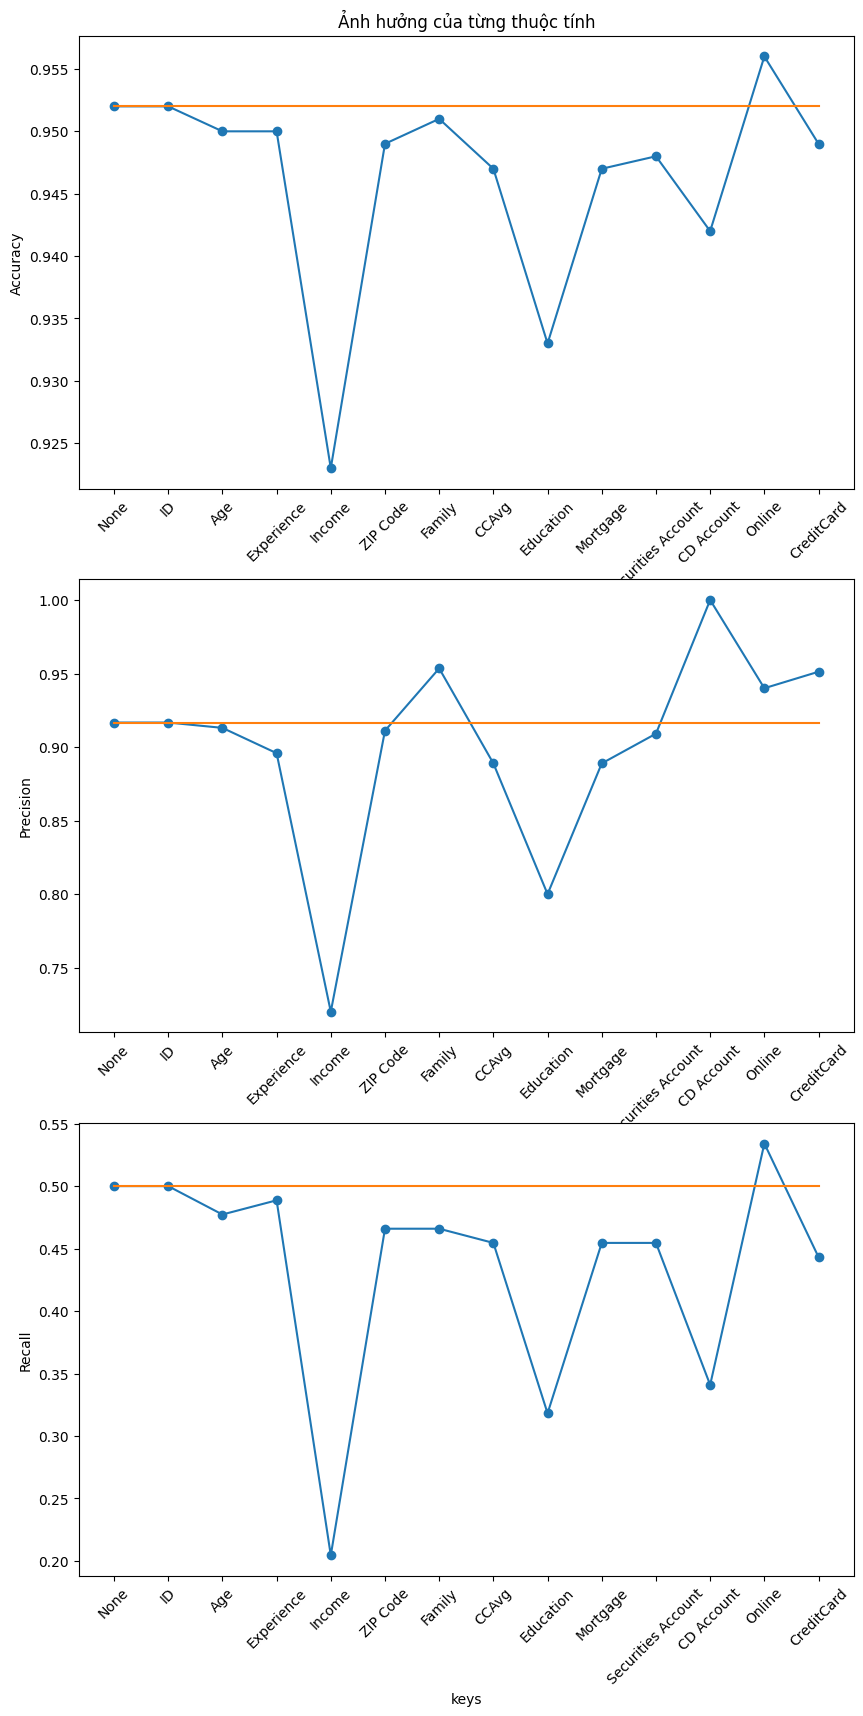

In [23]:
acc, pre, re = [], [], []
keys = ['None', 'ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
        'Education', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard']

for k in keys:
    if k == 'None':
        X = loan_dataset.drop(['Personal Loan', 'ID'], axis=1)
    else:
        X = loan_dataset.drop(['Personal Loan', k], axis=1)
    X = (X-X.min())/(X.max()-X.min())
    y = loan_dataset['Personal Loan']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)
    knn_classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots(3, 1, figsize=(10, 20))

axs[0].plot(keys, acc, marker='o')
axs[0].set_xlabel("keys")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Ảnh hưởng của từng thuộc tính")
axs[0].plot(keys, [acc[0] for _ in range(len(acc))], marker = '', label = 'Baseline')
axs[0].set_xticklabels(keys, rotation=45)

axs[1].plot(keys, pre, marker='o')
axs[1].set_xlabel("keys")
axs[1].set_ylabel("Precision")
axs[1].plot(keys, [pre[0] for _ in range(len(pre))], marker = '', label = 'Baseline')
axs[1].set_xticklabels(keys, rotation=45)

axs[2].plot(keys, re, marker='o')
axs[2].set_xlabel("keys")
axs[2].set_ylabel("Recall")
axs[2].plot(keys, [re[0] for _ in range(len(re))], marker = '', label = 'Baseline')
axs[2].set_xticklabels(keys, rotation=45)

plt.show()

## Lựa chọn hàm tính khoảng cách
- Hàm tính khoảng cách: minkowski, manhattan, euclidean, chebyshev
- Hàm tính khoảng cách nào là tốt nhất cho bài toán này ?

Đánh giá việc lựa chọn số lượng láng giềng

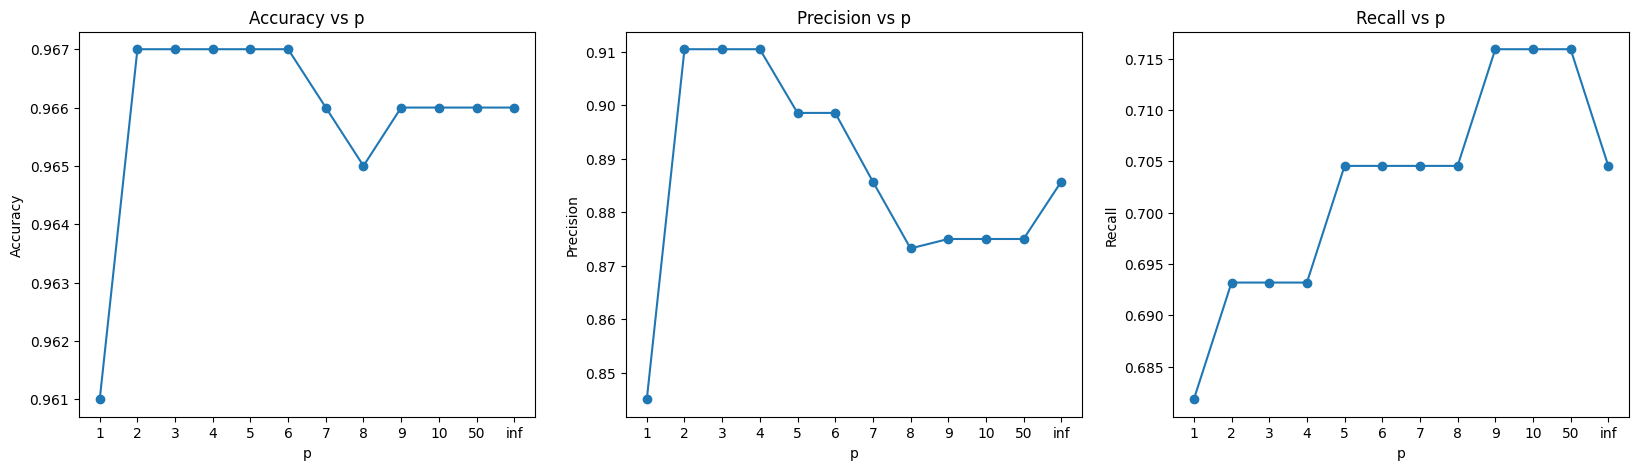

In [26]:
acc, pre, re = [], [], []
ps = [1,2,3,4,5,6,7,8,9,10,50,'inf']
X = loan_dataset.drop(['Personal Loan', 'ID'], axis=1)
X = (X-X.min())/(X.max()-X.min())
y = loan_dataset['Personal Loan']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

for p in ps:
    if p == 'inf':
        metric = 'chebyshev'
        p = 2
    else:
        metric = 'minkowski'
    knn_classifier = KNeighborsClassifier(n_neighbors = 2, metric = metric, p = p, weights = 'distance')
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    pre.append(precision_score(y_test, y_pred))
    re.append(recall_score(y_test, y_pred))

fig, axs = plt.subplots(1, 3, figsize=(20, 5))

axs[0].plot(ps, acc, marker='o')
axs[0].set_title('Accuracy vs p')
axs[0].set_xlabel('p')
axs[0].set_ylabel('Accuracy')

axs[1].plot(ps, pre, marker='o')
axs[1].set_title('Precision vs p')
axs[1].set_xlabel('p')
axs[1].set_ylabel('Precision')

axs[2].plot(ps, re, marker='o')
axs[2].set_title('Recall vs p')
axs[2].set_xlabel('p')
axs[2].set_ylabel('Recall')

plt.show()